In [5]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import metrics

In [6]:
cars=pd.read_table('Cars93.csv',sep=',')
cars

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [7]:
cars['Luggage.room'].mean()

13.890243902439025

In [8]:
cars['Luggage.room'].median()

14.0

In [9]:
cars['Luggage.room'].std()

2.9979667906847762

In [10]:
cars.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [11]:
cars["DriveTrain"].value_counts()

Front    67
Rear     16
4WD      10
Name: DriveTrain, dtype: int64

In [12]:
cars["Cylinders"]

0     4
1     6
2     6
3     6
4     4
5     4
6     6
7     6
8     6
9     8
10    8
11    4
12    4
13    6
14    4
15    6
16    6
17    8
18    8
19    6
20    4
21    6
22    4
23    4
24    4
25    6
26    4
27    6
28    4
29    6
     ..
63    4
64    4
65    6
66    6
67    4
68    4
69    6
70    6
71    4
72    4
73    4
74    6
75    6
76    6
77    4
78    4
79    3
80    4
81    4
82    3
83    4
84    4
85    4
86    4
87    4
88    5
89    4
90    6
91    4
92    5
Name: Cylinders, Length: 93, dtype: object

In [13]:
cars["Man.trans.avail"].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

In [14]:
cars["Fuel.tank.capacity"].value_counts()

18.0    9
20.0    9
13.2    8
15.9    7
18.5    6
16.0    5
11.9    4
15.5    4
16.5    3
15.2    3
21.1    3
23.0    2
14.5    2
19.8    2
10.6    2
12.4    2
12.8    1
17.0    1
9.2     1
18.4    1
13.7    1
27.0    1
15.8    1
14.0    1
10.0    1
21.0    1
22.5    1
11.1    1
16.4    1
16.9    1
19.0    1
19.6    1
15.6    1
18.8    1
20.6    1
17.2    1
15.4    1
19.3    1
Name: Fuel.tank.capacity, dtype: int64

In [15]:
cars['Luggage.room'].fillna((cars['Luggage.room'].mean()),inplace=True)

In [16]:
cars.isnull().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        2
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [17]:
cars['Rear.seat.room'].mean()

27.82967032967033

In [18]:
cars['Rear.seat.room'].median()

27.5

In [19]:
cars['Rear.seat.room'].fillna((cars['Rear.seat.room'].mean()),inplace=True)

In [20]:
cars.isnull().sum()

Unnamed: 0            0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [21]:
cars.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [23]:
ncars=cars.drop(["Unnamed: 0","Manufacturer","Model","Type","AirBags","Man.trans.avail","Origin","Make","DriveTrain","Price","Cylinders","Passengers","Rear.seat.room","Luggage.room"],axis=1)

In [24]:
ncars

,Min.Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Weight
0,12.9,18.8,25,31,1.8,140,6300,2890,13.2,177,102,68,37,2705
1,29.2,38.7,18,25,3.2,200,5500,2335,18.0,195,115,71,38,3560
2,25.9,32.3,20,26,2.8,172,5500,2280,16.9,180,102,67,37,3375
3,30.8,44.6,19,26,2.8,172,5500,2535,21.1,193,106,70,37,3405
4,23.7,36.2,22,30,3.5,208,5700,2545,21.1,186,109,69,39,3640
5,14.2,17.3,22,31,2.2,110,5200,2565,16.4,189,105,69,41,2880
6,19.9,21.7,19,28,3.8,170,4800,1570,18.0,200,111,74,42,3470
7,22.6,24.9,16,25,5.7,180,4000,1320,23.0,216,116,78,45,4105
8,26.3,26.3,19,27,3.8,170,4800,1690,18.8,198,108,73,41,3495
9,33.0,36.3,16,25,4.9,200,4100,1510,18.0,206,114,73,43,3620


In [25]:
ncars.columns

Index(['Min.Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Weight'],
      dtype='object')

In [26]:
X = ncars
y = cars["Price"]

In [27]:
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print(model.score(X,y))

0.9999921886945425


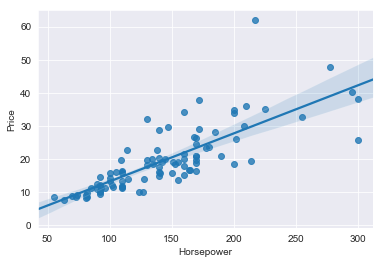

In [34]:
sb.regplot(x='Horsepower',y='Price',data=cars)

In [30]:
cars.corr()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Unnamed: 0,1.000000,-0.144463,-0.137277,-0.126567,0.161808,0.137317,-0.338286,-0.233012,0.167772,0.226389,-0.179034,-0.142252,-0.277911,-0.244888,-0.293592,-0.275867,-0.126129,-0.161114,-0.220525
Min.Price,-0.144463,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.361525,0.395783,0.666554
Price,-0.137277,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.301888,0.354635,0.647179
Max.Price,-0.126567,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.241600,0.307020,0.605142
MPG.city,0.161808,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.380435,-0.462204,-0.843139
MPG.highway,0.137317,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.364284,-0.327732,-0.810658
EngineSize,-0.338286,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.473740,0.618326,0.845075
Horsepower,-0.233012,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.236871,0.328568,0.738798
RPM,0.167772,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.333847,-0.481744,-0.427931
Rev.per.mile,0.226389,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.370410,-0.557095,-0.735264


In [31]:
cars['Price'].cov(ncars['Length'])

71.03713183730717

In [32]:
ncars['EngineSize'].cov(ncars['Max.Price'])

6.121921458625524

In [33]:
ncars[["Max.Price","Min.Price","EngineSize","Fuel.tank.capacity","Horsepower"]].cov()

,Max.Price,Min.Price,EngineSize,Fuel.tank.capacity,Horsepower
Max.Price,121.670977,87.477202,6.121921,21.027135,430.075900
Min.Price,87.477202,76.493022,5.856385,18.223317,367.574053
EngineSize,6.121921,5.856385,1.076122,2.583082,39.776999
Fuel.tank.capacity,21.027135,18.223317,2.583082,10.754271,122.253612
Horsepower,430.075900,367.574053,39.776999,122.253612,2743.078775
